# LeNet

构建 LeNet 网络，实现手写数字识别。

参考：[activatedgeek/LeNet-5: PyTorch implementation of LeNet-5 with live visualization (github.com)](https://github.com/activatedgeek/LeNet-5/tree/master)

## MNIST

In [47]:
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
import torch

In [2]:
trans = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])
train_dataset = MNIST(root='D:/temp/pytorch_cached_data', train=True, download=True, transform=trans)
test_dataset = MNIST(root='D:/temp/pytorch_cached_data', train=False, download=True, transform=trans)
print(len(train_dataset), len(test_dataset))

60000 10000


In [3]:
# 查看数据集中的第一个元素
train_dataset[0]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 5)

In [4]:
# 查看数据集中的第一个元素的张量的最值
train_dataset[0][0].min(), train_dataset[0][0].max()

(tensor(0.), tensor(0.9922))

In [42]:
def plot_image(img):
    fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    ax.imshow(img.permute(1, 2, 0), cmap='gray')
    plt.show()

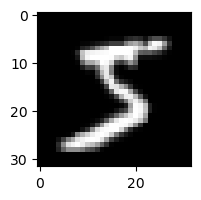

In [43]:
plot_image(train_dataset[0][0])

## LeNet-5

In [6]:
from torch import nn
from torch.utils.data import DataLoader
from torch import optim

In [7]:
class LeNet(nn.Module):
    """
    LeNet-5
    Input: 1x32x32
    """

    def __init__(self):
        super(LeNet, self).__init__()
        self.c1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.c2_1 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.c2_2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.c3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5),
            nn.ReLU()
        )
        self.f4 = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.ReLU()
        )
        self.f5 = nn.Sequential(
            nn.Linear(in_features=84, out_features=10),
            nn.LogSoftmax(dim=-1)
        )

    def forward(self, img):
        output = self.c1(img)
        x = self.c2_1(output)
        output = self.c2_2(output)
        output += x
        output = self.c3(output)
        output = output.view(img.size(0), -1)
        output = self.f4(output)
        output = self.f5(output)
        return output

In [8]:
lenet = LeNet()

## 训练

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lenet.parameters(), lr=2e-3)

In [10]:
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [37]:
def train(epoch: int):
    lenet.train()
    loss_list, batch_list = [], []
    for i, (images, labels) in enumerate(train_dataloader):
        optimizer.zero_grad()
        output = lenet(images)
        loss = criterion(output, labels)
        if i % 500 == 0:
            print(f'Epoch: {epoch}, Batch: {i}, Loss: {loss.detach().item()}')
        loss_list.append(loss.detach().item())
        batch_list.append(i)
        loss.backward()
        optimizer.step()


def test():
    lenet.eval()
    total_correct = 0
    avg_loss = 0.0
    for i, (images, labels) in enumerate(test_dataloader):
        output = lenet(images)
        avg_loss += criterion(output, labels).sum()
        pred = output.detach().max(1)[1]
        total_correct += pred.eq(labels.view_as(pred)).sum()
    avg_loss /= len(test_dataset)
    print(f'Accuracy: {total_correct}/{len(test_dataset)} ({total_correct * 100 / len(test_dataset):.0f}%)')

In [38]:
for epoch in range(5):
    train(epoch)
    test()

Epoch: 0, Batch: 0, Loss: 0.0015861410647630692
Epoch: 0, Batch: 500, Loss: 0.004858912900090218
Epoch: 0, Batch: 1000, Loss: 0.007136953063309193
Epoch: 0, Batch: 1500, Loss: 0.0005152271478436887
Epoch: 0, Batch: 2000, Loss: 8.928524039220065e-05
Epoch: 0, Batch: 2500, Loss: 0.014991628006100655
Epoch: 0, Batch: 3000, Loss: 2.4586674953752663e-06
Epoch: 0, Batch: 3500, Loss: 2.2351721895574883e-07
Epoch: 0, Batch: 4000, Loss: 0.0019634640775620937
Epoch: 0, Batch: 4500, Loss: 0.025726469233632088
Epoch: 0, Batch: 5000, Loss: 0.0729566365480423
Epoch: 0, Batch: 5500, Loss: 0.00020734222198370844
Epoch: 0, Batch: 6000, Loss: 0.0033385520800948143
Epoch: 0, Batch: 6500, Loss: 0.000206784374313429
Epoch: 0, Batch: 7000, Loss: 0.000996135757304728
Accuracy: 9817/10000 (98%)
Epoch: 1, Batch: 0, Loss: 0.009638662450015545
Epoch: 1, Batch: 500, Loss: 0.011386757716536522
Epoch: 1, Batch: 1000, Loss: 4.6193514435799443e-07
Epoch: 1, Batch: 1500, Loss: 7.003377959335921e-06
Epoch: 1, Batch: 20

In [48]:
# save model
torch.save(lenet.state_dict(), 'lenet.pth')

## 推理

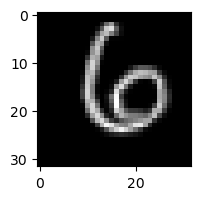

In [44]:
plot_image(test_dataset[100][0])

In [46]:
lenet(test_dataset[100][0].unsqueeze(0)).argmax()

tensor(6)